In [ ]:
import pandas
import numpy

from datetime import datetime, timedelta

import seaborn
import matplotlib.pyplot
import statsmodels

# import statsmodels.formula.api
# import statsmodels.api

import scipy.stats

from sklearn import *
# from sklearn.preprocessing import  StandardScaler


In [ ]:
data = pandas.read_csv('/content/Data DS.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# finding the columns with missing entries

data.isnull().any()


CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [ ]:
# filling the missing entries with median of the respective columns
credit_limit = data['CREDIT_LIMIT']
credit_limit.fillna(credit_limit.median(), inplace=True)


min_payments = data['MINIMUM_PAYMENTS']
min_payments.fillna(min_payments.median(), inplace=True)


In [ ]:
data.isnull().any()


CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [ ]:
# deriving new KPI
data['MonthlyAvgPurchases'] = data['PURCHASES']/data['TENURE']
data['MonthlyCashAdvance'] = data['CASH_ADVANCE']/data['TENURE']

In [ ]:
data.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]


,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [ ]:
# analysing the data
print(data[(data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']==0)].shape)
print(data[(data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']>0)].shape)
print(data[(data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']==0)].shape)
print(data[(data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']>0)].shape)


(2042, 20)
(2774, 20)
(1874, 20)
(2260, 20)


In [ ]:
def PurchasingBehaviour(data):
  if (data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']==0):
    return 'OneOff'
  if (data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']>0):
    return 'Installment'
  if (data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']>0):
    return 'Both'
  if (data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']==0):
    return 'Neither'

In [ ]:
data['PurchaseBehaviour']=data.apply(PurchasingBehaviour,axis=1)



In [ ]:
data['PurchaseBehaviour'].value_counts()

Both           2774
Installment    2260
Neither        2042
OneOff         1874
Name: PurchaseBehaviour, dtype: int64

In [ ]:
data['LimitUsage'] = data.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)


In [ ]:
data['MinPayment']=data.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [ ]:
DataLog=data.drop(['CUST_ID','PurchaseBehaviour'],axis=1).applymap(lambda x: numpy.log(x+1))

In [ ]:
DataLog.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MonthlyAvgPurchases,MonthlyCashAdvance,LimitUsage,MinPayment
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [ ]:
cols = ['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS',
        'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
PreData = DataLog[[x for x in DataLog.columns if x not in cols]]


In [ ]:
PreData.columns


Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'MonthlyAvgPurchases',
       'MonthlyCashAdvance', 'LimitUsage', 'MinPayment'],
      dtype='object')

In [ ]:
DataLog.columns


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'MonthlyAvgPurchases', 'MonthlyCashAdvance', 'LimitUsage',
       'MinPayment'],
      dtype='object')

In [ ]:
x=data.groupby('PurchaseBehaviour').apply(lambda x: numpy.mean(x['MinPayment']))
type(x)
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

In [ ]:
x.barh


AttributeError: ignored

Text(0.5, 1.0, 'Mean payment to minimum payment ratio for each purchase type')

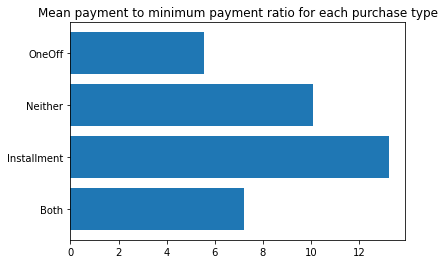

In [ ]:
fig,ax=matplotlib.pyplot.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= numpy.arange(len(x)),yticklabels = x.index);
matplotlib.pyplot.title('Mean payment to minimum payment ratio for each purchase type')

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, Neither, Installment, OneOff')

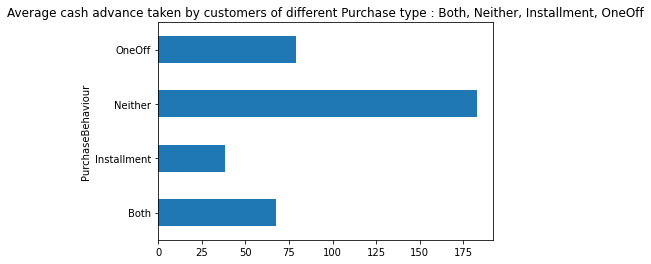

In [ ]:
# customers with installment purchases are paying dues
data.groupby('PurchaseBehaviour').apply(lambda x: numpy.mean(x['MonthlyCashAdvance'])).plot.barh()
matplotlib.pyplot.title('Average cash advance taken by customers of different Purchase type : Both, Neither, Installment, OneOff')

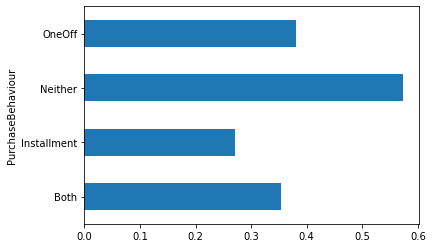

In [ ]:
# Customers who don't do either one-off or installment purchases take more cash on advance
data.groupby('PurchaseBehaviour').apply(lambda x: numpy.mean(x['LimitUsage'])).plot.barh()



In [ ]:
# Original dataset with categorical column converted to number type.
DataOg=pandas.concat([data,pandas.get_dummies(data['PurchaseBehaviour'])],axis=1)


In [ ]:
# We do have some categorical data which need to convert with the help of dummy creation
PreData['PurchaseBehaviour'] = data.loc[:,'PurchaseBehaviour']
pandas.get_dummies(PreData['PurchaseBehaviour'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Both,Installment,Neither,OneOff
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


In [ ]:
# Now merge the created dummy with the original data frame
DataDummy = pandas.concat([PreData,pandas.get_dummies(PreData['PurchaseBehaviour'])],axis=1)

In [ ]:
L = ['PurchaseBehaviour']

In [ ]:
DataDummy=DataDummy.drop(L,axis=1)
DataDummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
MonthlyAvgPurchases                 False
MonthlyCashAdvance                  False
LimitUsage                          False
MinPayment                          False
Both                                False
Installment                         False
Neither                             False
OneOff                              False
dtype: bool

In [ ]:
DataDummy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   float64
 8   PURCHASES_TRX                     8950 non-null   float64
 9   MonthlyAvgPurchases               8950 non-null   float64
 10  MonthlyCashAdvance                8950 non-null   float64
 11  LimitUsage                        8950 non-null   float64
 12  MinPay

In [ ]:
DataDummy.head(10)

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MonthlyAvgPurchases,MonthlyCashAdvance,LimitUsage,MinPayment,Both,Installment,Neither,OneOff
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,0,0,0,1
5,0.693147,0.000000,7.196147,0.510826,0.000000,0.459532,0.000000,0.000000,2.197225,4.719451,0.000000,0.695874,0.458438,0,1,0,0
6,0.693147,8.764620,6.535793,0.693147,0.693147,0.693147,0.000000,0.000000,4.174387,6.383367,0.000000,0.045417,3.498984,1,0,0,0
7,0.693147,0.000000,6.080391,0.693147,0.000000,0.693147,0.000000,0.000000,2.564949,3.620333,0.000000,0.583830,0.822576,0,1,0,0
8,0.693147,6.496005,5.303305,0.287682,0.080042,0.223144,0.000000,0.000000,1.791759,4.287590,0.000000,0.135395,1.165111,1,0,0,0
9,0.435318,7.156645,0.000000,0.154151,0.154151,0.000000,0.000000,0.000000,1.386294,4.680278,0.000000,0.013744,2.534697,0,0,0,1


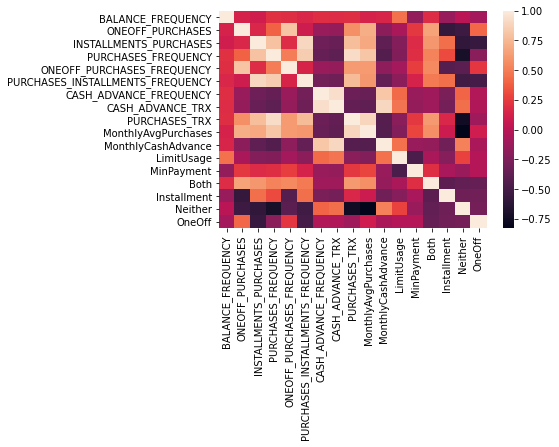

In [ ]:
seaborn.heatmap(DataDummy.corr())
# Heat map shows that many features are co-related so applying dimensionality 
# reduction will help negating multi-colinearity in data
# Before applying PCA we will standardize data to avoid effect of scale on our result. 
# Centering and Scaling will make all features with equal weight.

In [ ]:
# Scaling the data
scaler = preprocessing.StandardScaler()
ScaledData = scaler.fit_transform(DataDummy)

In [ ]:
ScaledData

array([[-0.14875746, -0.98708958,  0.39447984, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [ 0.17961568, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [ 0.49271003,  1.06202168, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249],
       ...,
       [-0.09290575, -0.98708958,  0.52779444, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [-0.09290575, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [-0.73437135,  1.16861854, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249]])

In [ ]:
# Applying PCA
# With the help of principal component analysis we will reduce features
# We have 17 features so our n_component will be 17.
pca = decomposition.PCA(n_components=17)
DataPCA = pca.fit(ScaledData)


In [ ]:
# Lets check if we will take 17 
# component then how much varience it explain. 
# Ideally it should be 1 i.e 100%

sum(DataPCA.explained_variance_ratio_)


1.0

In [ ]:
VarianceRatios = {}
for xyz in range(2,18):
    pca = decomposition.PCA(n_components=xyz)
    DataPCA = pca.fit(ScaledData)
    VarianceRatios[xyz]=sum(DataPCA.explained_variance_ratio_)

In [ ]:
VarianceRatios

{2: 0.5826439793960282,
 3: 0.7299379309512694,
 4: 0.8115442762351256,
 5: 0.8770555795291436,
 6: 0.918649244351261,
 7: 0.9410925256030139,
 8: 0.9616114053683059,
 9: 0.9739787081990645,
 10: 0.9835896584630701,
 11: 0.9897248107341958,
 12: 0.9927550009135223,
 13: 0.9953907562385423,
 14: 0.9979616898169594,
 15: 0.9996360473172955,
 16: 1.0,
 17: 1.0}

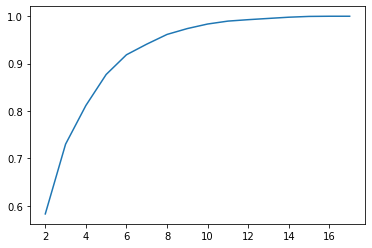

In [ ]:
pandas.Series(VarianceRatios).plot()


In [ ]:
# selecting 5 principal components on the basis of their variance ratios.

PCs = decomposition.PCA(n_components=6).fit(ScaledData)
ReducedData = PCs.fit_transform(ScaledData)

In [ ]:
df = pandas.DataFrame(ReducedData)


In [ ]:
df.head()

,0,1,2,3,4,5
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214


In [ ]:
pandas.DataFrame(PCs.components_.T, 
                 columns = ['PC: ' + str(s) for s in range(6)],
                 index = DataDummy.columns)



,PC: 0,PC: 1,PC: 2,PC: 3,PC: 4,PC: 5
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681,-0.693816
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197,0.129094
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181,0.115223
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948,-0.081879
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279,-0.097299
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871,0.006731
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132,0.066589
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753,0.082307
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971,-0.009402
MonthlyAvgPurchases,0.345992,0.141635,0.023986,-0.079373,0.194147,0.015878


In [ ]:
# So above data gave us eigen vector for each component we had all eigen vector value 
# very small we can remove those variable bur in our case its not.
# Factor Analysis : variance explained by each component- 
pandas.Series(PCs.explained_variance_ratio_, index=['PC: '+ str(s) for s in range(6)])

PC: 0    0.402058
PC: 1    0.180586
PC: 2    0.147294
PC: 3    0.081606
PC: 4    0.065511
PC: 5    0.041594
dtype: float64

In [ ]:
# Clustering
# Based on the intuition on type of purchases made by customers 
# and their distinctive behavior exhibited based on 
# the purchase_type (as visualized above in Insights from KPI), 
# I am starting with 4 clusters.

KM4 = cluster.KMeans(n_clusters = 4, random_state = 123)

In [ ]:
KM4.fit(ReducedData)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [ ]:
KM4.labels_

array([0, 1, 3, ..., 0, 1, 3], dtype=int32)

In [ ]:
pandas.Series(KM4.labels_).value_counts()


2    2769
0    2224
1    2088
3    1869
dtype: int64

In [ ]:
ClusterRange = range( 1, 25 )
ClusterErrors = []

for n in ClusterRange:
    clusters = cluster.KMeans(n)
    clusters.fit(ReducedData)
    ClusterErrors.append(clusters.inertia_)# clusters.inertia_ is basically cluster error here.

In [ ]:
ClustersDF = pandas.DataFrame( { "n":ClusterRange, "ClusterErrors": ClusterErrors } )

ClustersDF[0:25]

,n,ClusterErrors
0,1,139772.482528
1,2,93307.797522
2,3,70745.193400
3,4,49446.066485
4,5,42548.605568
5,6,37712.952211
6,7,34124.681732
7,8,31164.908105
8,9,28601.758619
9,10,26302.864848


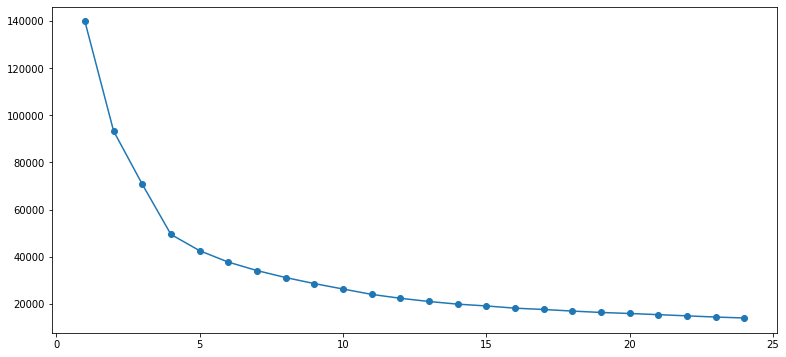

In [ ]:
matplotlib.pyplot.figure(figsize=(13,6))
matplotlib.pyplot.plot( ClustersDF.n, ClustersDF.ClusterErrors, marker = "o" )

In [ ]:
# From above graph we will find elbow range. here it is 4,5,6
KRange = range(2, 25)
Scores = []
for K in KRange:
    KM = cluster.KMeans(n_clusters=K, random_state=1)
    KM.fit(ReducedData)
    Scores.append(metrics.silhouette_score(ReducedData, KM.labels_))


In [ ]:
Scores

[0.3312680667306927,
 0.35434954252843254,
 0.43708577439659496,
 0.4312372371852389,
 0.42288676393994185,
 0.3937963135186253,
 0.41809162539140143,
 0.3891730077243382,
 0.3931386449748958,
 0.3678804540227034,
 0.3670035207564237,
 0.35133150578842687,
 0.35261478354017795,
 0.3295422783441287,
 0.3339471644625439,
 0.33818909037815487,
 0.3354282536390573,
 0.3304092305070633,
 0.3215328121767455,
 0.32204086382007174,
 0.3223368387014672,
 0.3179560937041713,
 0.3177476132378055]

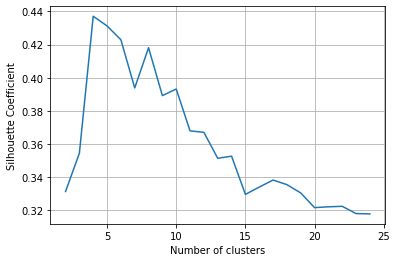

In [ ]:
matplotlib.pyplot.plot(KRange, Scores)
matplotlib.pyplot.xlabel('Number of clusters')
matplotlib.pyplot.ylabel('Silhouette Coefficient')
matplotlib.pyplot.grid(True)

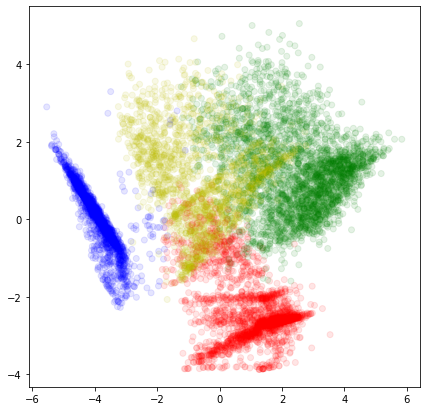

In [ ]:
ColourMap={0:'r',1:'b',2:'g',3:'y'}
LabelColour=[ColourMap[abc] for abc in KM4.labels_]
matplotlib.pyplot.figure(figsize=(7,7))
matplotlib.pyplot.scatter(ReducedData[:,0],
                          ReducedData[:,1],
                          c = LabelColour,
                          cmap = 'Spectral',alpha=0.1)

In [ ]:
DFPairPlot=pandas.DataFrame(ReducedData,columns=['PC: ' +str(i) for i in range(6)])

In [ ]:
DFPairPlot['Cluster']=KM4.labels_ #Add cluster column in the data frame


In [ ]:
DFPairPlot.head()


,PC: 0,PC: 1,PC: 2,PC: 3,PC: 4,PC: 5,Cluster
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755,0
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463,1
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932,3
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986,3
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214,3


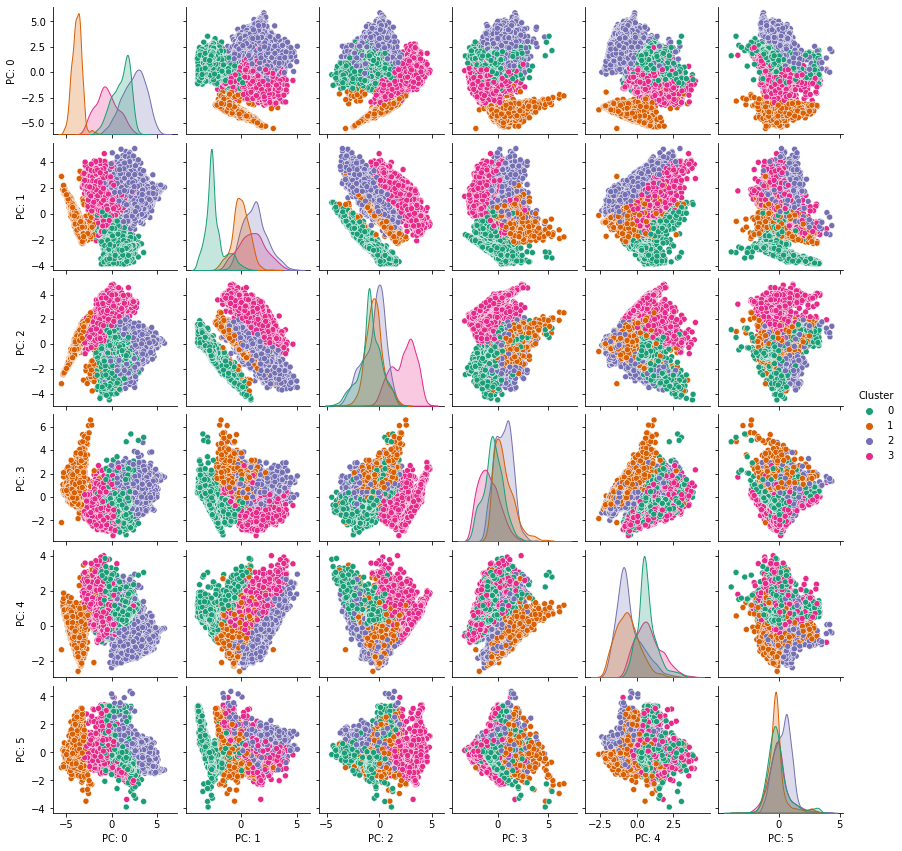

In [ ]:
#pairwise relationship of components on the data
seaborn.pairplot(DFPairPlot,
                 hue='Cluster', 
                 palette= 'Dark2', 
                 diag_kind='kde',
                 height = 2)

In [ ]:
# Key performace variable selection . here i am taking varibales which we will use in derving new KPI. 
#We can take all 17 variables but it will be difficult to interprate.So are are selecting less no of variables.

ColsKPI=['PURCHASES_TRX','MonthlyAvgPurchases','MonthlyCashAdvance','LimitUsage','CASH_ADVANCE_TRX',
         'MinPayment','Both','Installment','Neither','OneOff','CREDIT_LIMIT']

In [ ]:
# Conactenating labels found through Kmeans with data 
ClusterDF4 = pandas.concat([DataOg[ColsKPI],
                            pandas.Series(KM4.labels_,name='Cluster4')],axis=1)

In [ ]:
# Mean value gives a good indication of the distribution of data. 
# So we are finding mean value for each variable for each cluster
Clus4 = ClusterDF4.groupby('Cluster4')\
.apply(lambda x: x[ColsKPI].mean()).T
Clus4

Cluster4,0,1,2,3
PURCHASES_TRX,12.062050,0.043582,33.013723,7.127341
MonthlyAvgPurchases,47.626256,0.148297,193.008043,69.875917
MonthlyCashAdvance,33.550080,186.281319,67.466910,78.098613
LimitUsage,0.264745,0.576076,0.353591,0.379761
CASH_ADVANCE_TRX,1.021133,6.540230,2.804261,2.881220
MinPayment,13.422420,9.936617,7.245651,5.573672
Both,0.000000,0.001916,1.000000,0.000535
Installment,1.000000,0.017241,0.000000,0.000000
Neither,0.000000,0.977969,0.000000,0.000000
OneOff,0.000000,0.002874,0.000000,0.999465


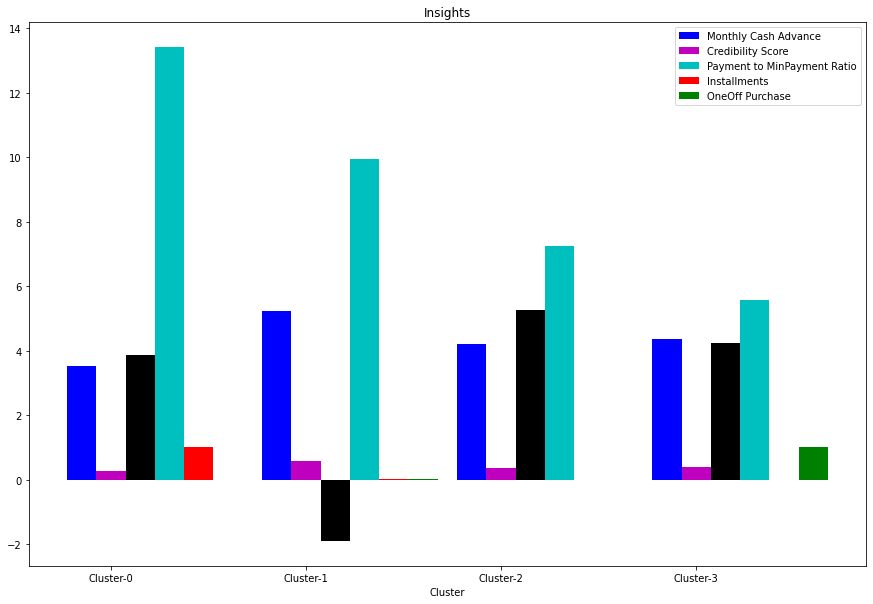

In [ ]:
fig,ax = matplotlib.pyplot.subplots(figsize=(15,10))
index = numpy.arange(len(Clus4.columns))

CashAdvance = numpy.log(Clus4.loc['MonthlyCashAdvance',:].values)
CredibilityScore = (Clus4.loc['LimitUsage',:].values)
Purchase = numpy.log(Clus4.loc['MonthlyAvgPurchases',:].values)
Payment = Clus4.loc['MinPayment',:].values
Installment = Clus4.loc['Installment',:].values
One_Off = Clus4.loc['OneOff',:].values


BarWidth=.15
bar1 = matplotlib.pyplot.bar(index,
                             CashAdvance,
                             color='b',
                             label='Monthly Cash Advance',
                             width=BarWidth)
bar2 = matplotlib.pyplot.bar(index+BarWidth,
                           CredibilityScore,
                           color='m',
                           label='Credibility Score',
                           width=BarWidth)
bar3 = matplotlib.pyplot.bar(index+2*BarWidth,
                           Purchase,color = 'k',
                           label='',
                           width=BarWidth)
bar4 = matplotlib.pyplot.bar(index+3*BarWidth,
                           Payment,color='c',
                           label='Payment to MinPayment Ratio',
                           width=BarWidth)
bar5 = matplotlib.pyplot.bar(index+4*BarWidth,
                           Installment,color='r',
                           label='Installments',
                           width=BarWidth)
bar6 = matplotlib.pyplot.bar(index+5*BarWidth,
                           One_Off,color='g',
                           label='OneOff Purchase',
                           width=BarWidth)

matplotlib.pyplot.xlabel("Cluster")
matplotlib.pyplot.title("Insights")
matplotlib.pyplot.xticks(index + BarWidth, ('Cluster-0', 'Cluster-1', 'Cluster-2', 'Cluster-3'))
matplotlib.pyplot.legend()

Cluster 0 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off purchases, have comparatively good credit score. This group is about 31% of the total customer base

cluster 1 is taking maximum advance_cash and is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. This group is about 23% of the total customer base

Cluster 2 customers have maximum credit score and are paying dues and are doing maximum installment purchases. This group is about 25% of the total customer base

Cluster 3 customers are doing maximum One_Off transactions and least payment ratio. This group is about 21% of the total customer base



In [ ]:
SilhouetteScore = {}
CalinskiScore = {}
for ab in range(3,10):
    KMScore = cluster.KMeans(n_clusters = ab)
    KMScore.fit(ReducedData)
    CalinskiScore[ab] = metrics.calinski_harabasz_score(ReducedData,KMScore.labels_)
    SilhouetteScore[ab] = metrics.silhouette_score(ReducedData,KMScore.labels_)

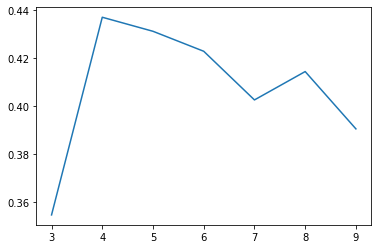

In [ ]:
pandas.Series(SilhouetteScore).plot()



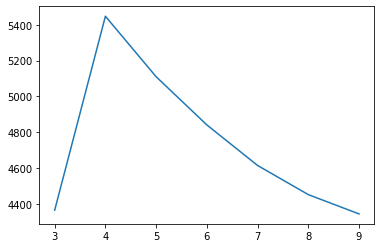

In [ ]:
pandas.Series(CalinskiScore).plot()